In [3]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from yellowbrick.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.utils import shuffle
from yellowbrick.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer
import warnings
from sklearn.exceptions import ConvergenceWarning
#load dataset
plt.style.use('ggplot')

df =load_digits()
# Extracting Attributes / Features
X = df.data

# Extracting Target / Class Labels
y = df.target
#divide to train and test split
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

#define soc formula for SVM 
def get_soc_svm(kernel,sp,p):
    if kernel=='rbf':
        return sp*(3*p+3)
    if kernel == 'linear':
        return sp*(2*p+1)
    if kernel == 'poly':
        return sp*(2*p+3+2)
    
    return sp*(2*p+12)

In [4]:

# Extracting Attributes / Features
X = df.data

# Extracting Target / Class Labels
y = df.target
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)
model=SVC()
#function returns SOC value
def get_soc(kernel,sp,p):
    if kernel=='rbf':
        return sp*(3*p+3)
    if kernel == 'linear':
        return sp*(2*p+1)
    if kernel == 'poly':
        return sp*(2*p+3+2)
    
    return sp*(2*p+12)

#custom metric based on SOC
def soc_metric(model,*args,**kwargs):
  X,y=args
  return -get_soc(model.kernel,len(model.support_vectors_),X.shape[1])

Min SOC:  45220  corresponding gamma:  0.000215443469  and C:  1000.0  and SV:  323


[Text(0.5, 1.0, 'IRIS SVM SOC vs. accuracy')]

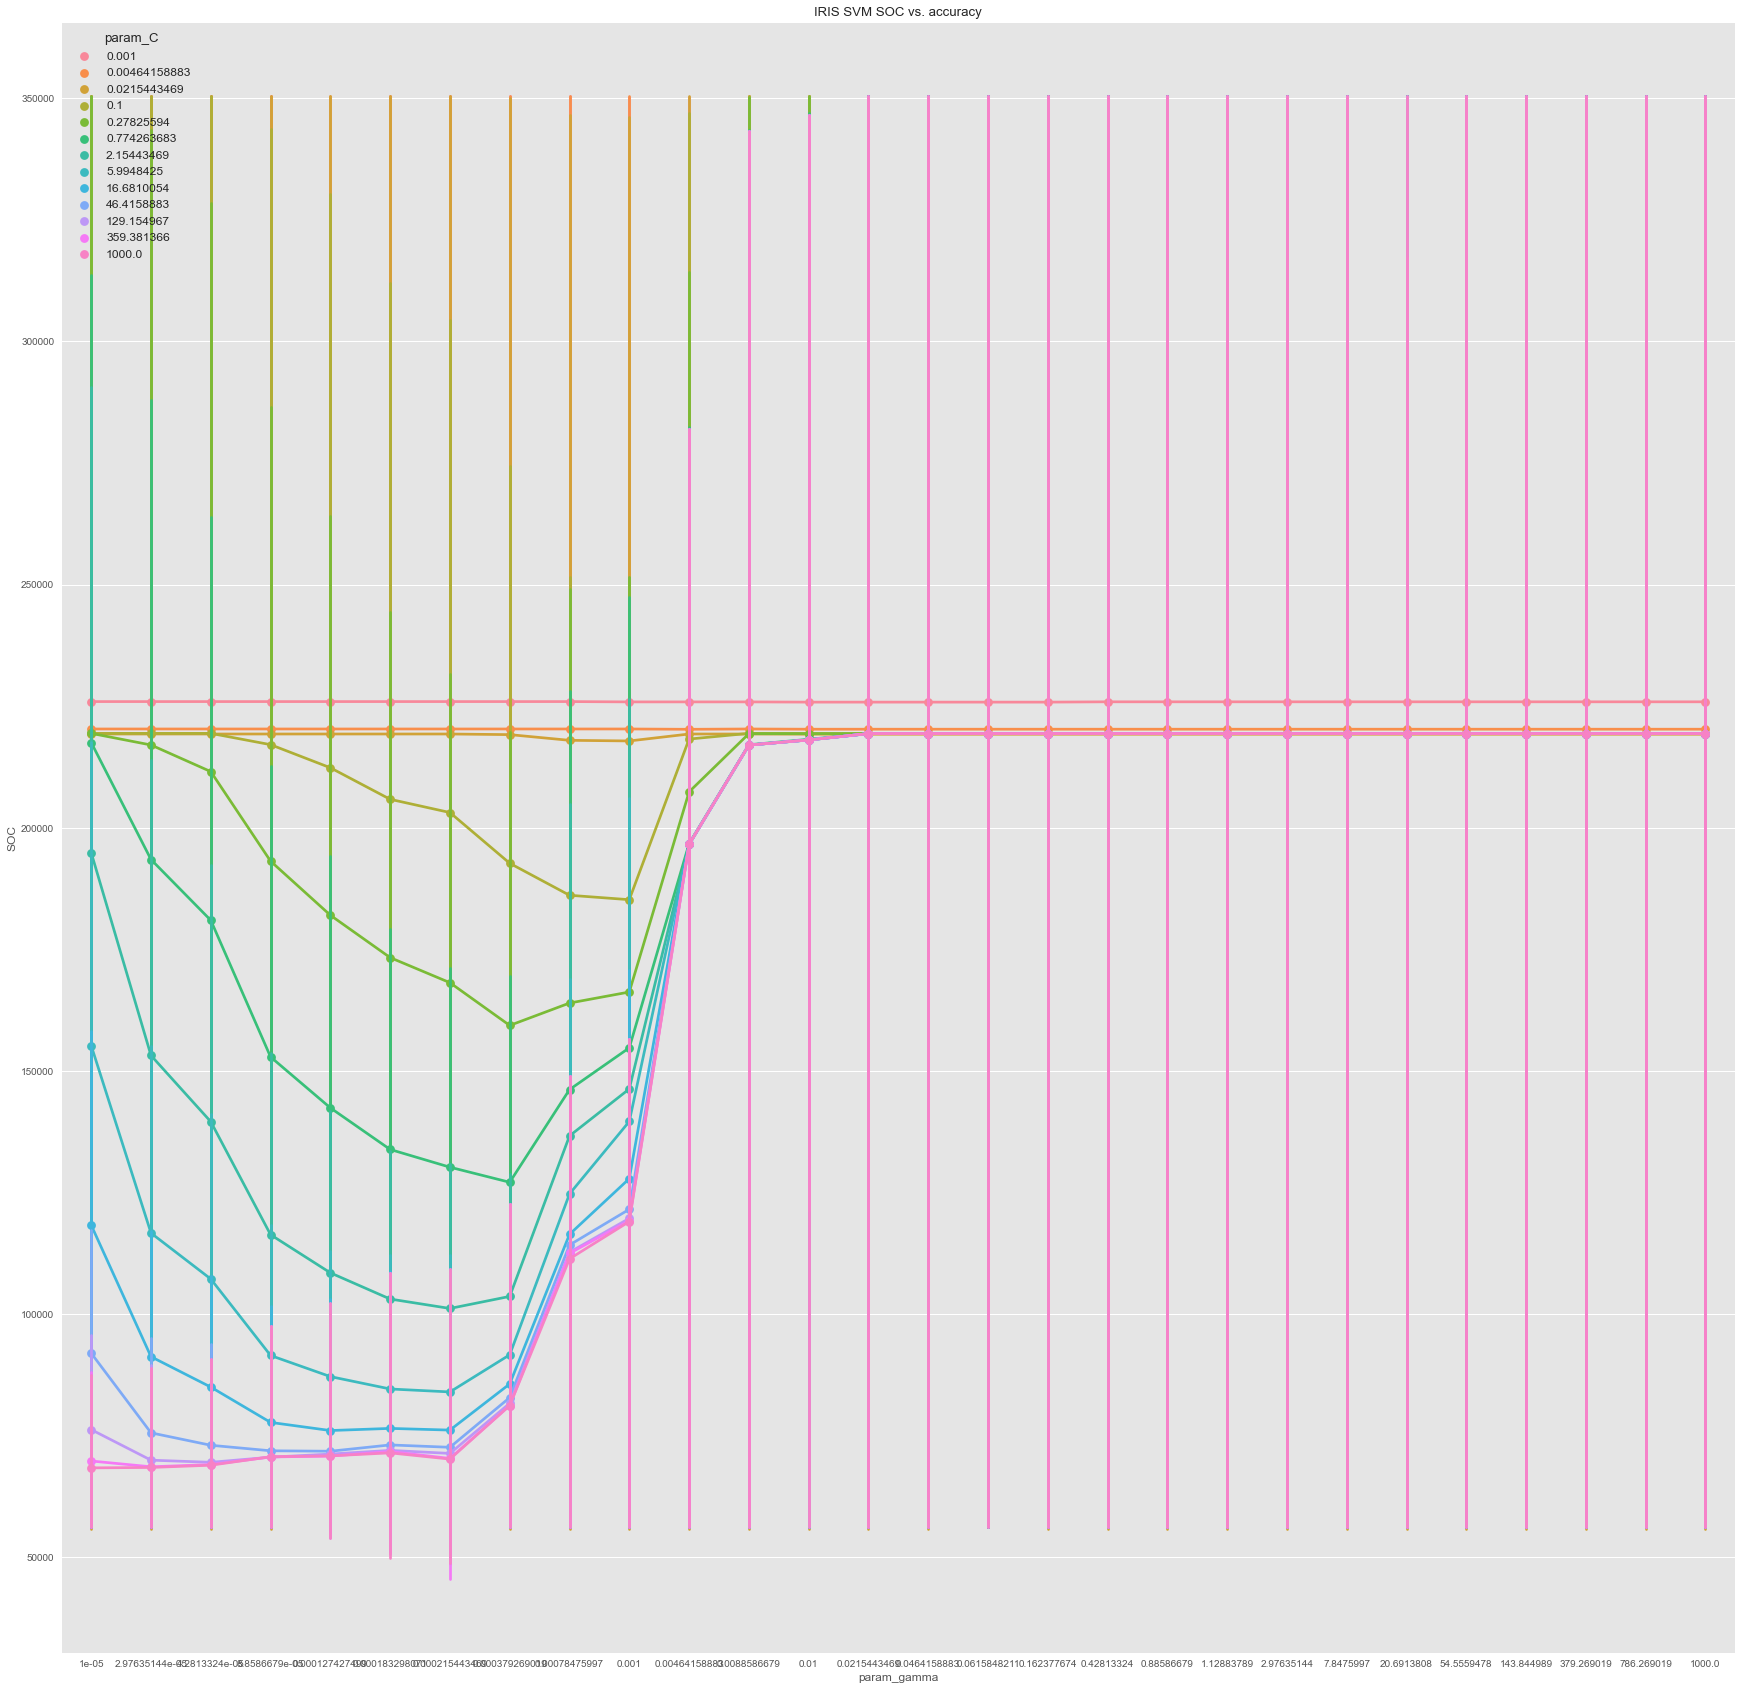

In [5]:
k=X.shape[1]

gammas = [ 1.00000000e-05, 2.97635144e-05, 4.28133240e-05, 8.85866790e-05,
           1.27427499e-04, 1.83298071e-04, 2.15443469e-04, 3.79269019e-04, 
           7.84759970e-04, 1.00000000e-03, 4.64158883e-03, 8.85866790e-03,
           1.00000000e-02, 2.15443469e-02, 4.64158883e-02, 6.15848211e-02, 
           1.62377674e-01, 4.28133240e-01, 8.85866790e-01, 1.12883789e+00, 
           2.97635144e+00, 7.84759970e+00, 2.06913808e+01, 5.45559478e+01, 
           1.43844989e+02, 3.79269019e+02, 7.86269019e+02, 1.00000000e+03]
cs=[1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01, 2.78255940e-01, 7.74263683e-01, 2.15443469e+00,
       5.99484250e+00, 1.66810054e+01, 4.64158883e+01, 1.29154967e+02,
       3.59381366e+02, 1.00000000e+03]
list_C=[]
list_gamma=[]
min_soc = 1000000
min_gamma=100000
min_c = 100000
socs = np.array([])
accuracies=np.array([])
colors=np.array([])
minAccuracy=0.001
rows_list = []
for C in cs:
    for gamma in gammas:
        for kernel_type in ['rbf','linear','sigmoid']:
            model = SVC(C=C,gamma=gamma,kernel=kernel_type)
            model.fit(X,y)
            soc = get_soc_svm(model.kernel,len(model.support_vectors_),k)
            if min_soc>soc:
                min_soc = soc
                min_soc_gamma=gamma
                min_soc_C = C
                min_soc_sp = len(model.support_vectors_)
            socs = np.append(socs,soc)
            accuracy = cross_val_score(model,X,y,cv=5,scoring='accuracy')
            accuracy=np.abs(np.mean(accuracy))
            accuracies = np.append(accuracies,accuracy)
            dics_val = {'SOC':soc, 'param_C': C, 'param_gamma':gamma}
            rows_list.append(dics_val)
df_res = pd.DataFrame(rows_list)
fig,ax = plt.subplots(figsize=(30,30))

sns.set(font_scale=1.1)

sns.pointplot(data=df_res[['SOC',
                           'param_C',
                           'param_gamma']],
             y='SOC',x='param_gamma',
             hue='param_C',ax=ax)
ax.set(title="IRIS SVM SOC vs. accuracy")


In [6]:
filtered_socs_with_accuracy = [[],[]] #[[socs],[accuracies]]
index_filtered=0
for i in range(len(socs)):
    if(socs[i] not in filtered_socs_with_accuracy[0]):
        filtered_socs_with_accuracy[0].append(socs[i])
        filtered_socs_with_accuracy[1].append(accuracies[i])
        index_filtered+=1
    else:
        for j in range(len(filtered_socs_with_accuracy[0])):
            if socs[i] == filtered_socs_with_accuracy[0][j]:
                if(accuracies[i] > filtered_socs_with_accuracy[1][j]):
                    filtered_socs_with_accuracy[1][j]=accuracies[i]
                    break
for j in range(len(filtered_socs_with_accuracy[0])):
        print(filtered_socs_with_accuracy[0][j],' : ',filtered_socs_with_accuracy[1][j])

350415.0  :  0.6956344784896317
75852.0  :  0.951047663262148
251580.0  :  0.6833952336737852
350220.0  :  0.1725348189415042
251440.0  :  0.7045280099040545
58953.0  :  0.9482652429588363
55857.0  :  0.9482544103992572
350025.0  :  0.731804394924172
346515.0  :  0.8135840297121634
346125.0  :  0.7929990714948932
56244.0  :  0.9476973073351903
343590.0  :  0.8736939028164654
330330.0  :  0.8920581863200248
250460.0  :  0.7818647477561126
312000.0  :  0.9065258433921386
249340.0  :  0.8514314453729496
304395.0  :  0.9104178272980501
248780.0  :  0.8603419993809964
274365.0  :  0.927110801609409
247520.0  :  0.8447508511296812
250575.0  :  0.9410275456515012
247845.0  :  0.9432513153822347
346905.0  :  0.5108820798514391
343395.0  :  0.8753621169916433
328380.0  :  0.8948375116063139
250040.0  :  0.8085762921696069
286455.0  :  0.9170984215413185
236740.0  :  0.8931708449396473
264030.0  :  0.9276725471990096
225820.0  :  0.9026307644692046
244335.0  :  0.9349086969978335
219380.0  :  0.

min SOC:  45220.0  corresponding accuracy:  0.9738502011761063
Min SOC:  45220.0  corresponding gamma:  0.000215443469  and C:  1000.0  and SV:  323


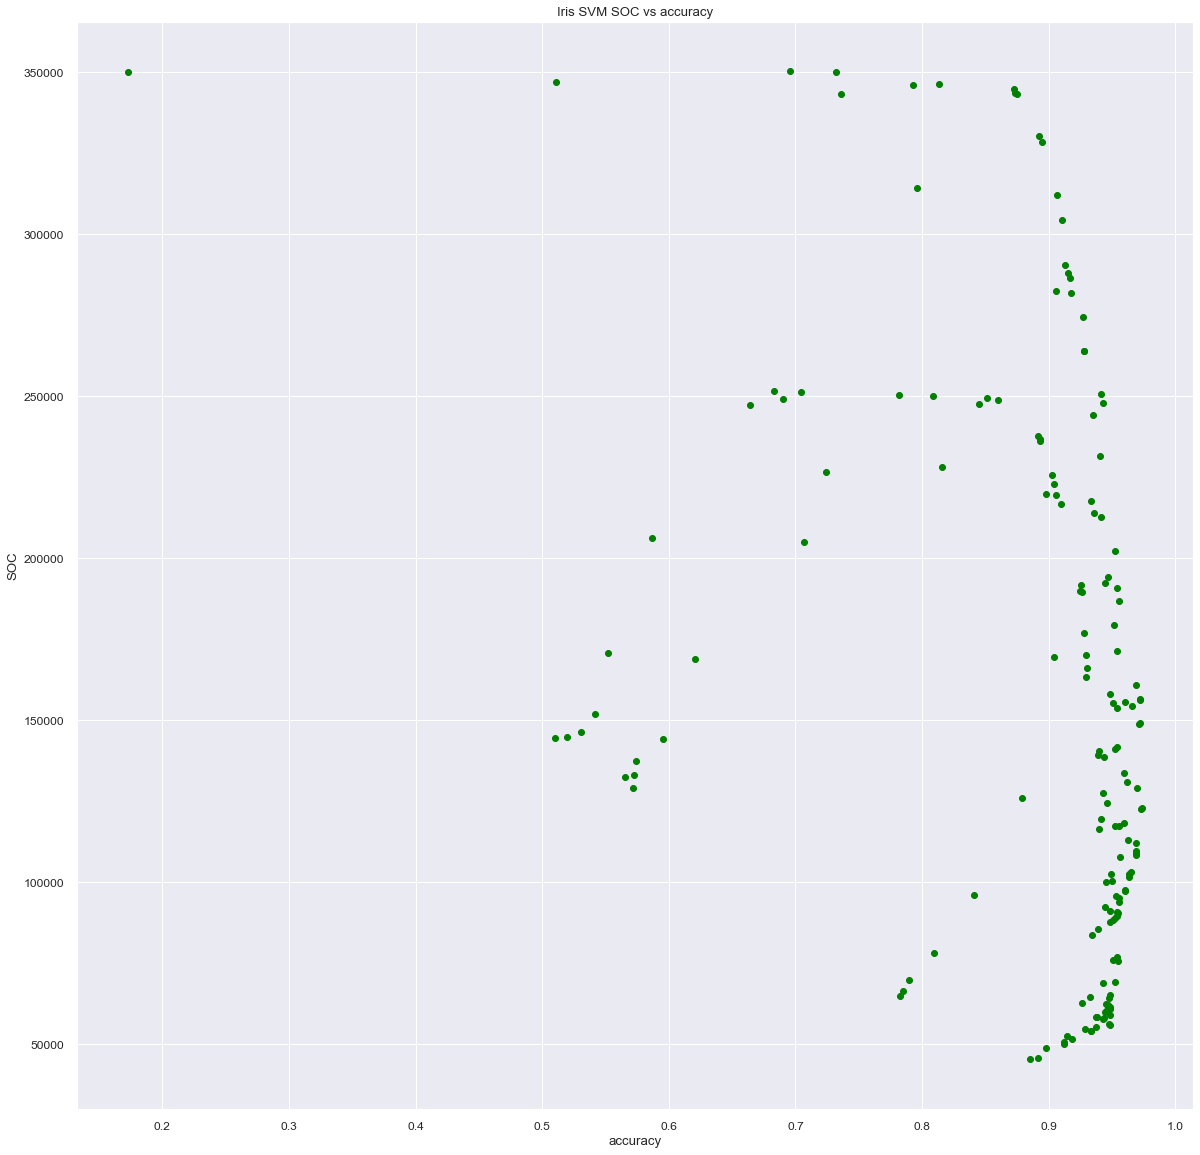

In [7]:

plt.figure(figsize=(20,20))
plt.title('MNIST SVM SOC vs accuracy')
colors=np.append(colors,'green')
plt.scatter(filtered_socs_with_accuracy[1],filtered_socs_with_accuracy[0],c=colors)
plt.xlabel('accuracy')
plt.ylabel('SOC')
plt.style.use('ggplot')
max_acc = max(accuracies)
min_soc = min(socs)


plt.rcParams.update({'font.size': 35})
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.show()